# Projeto de ciência de dados ponta a ponta para manutenção

Construindo um modelo de classificação para prever o tipo de falha, reduzir o tempo de inatividade da máquina e garantir a confiabilidade da manutenção correta.

No domínio da manutenção industrial, prever e prevenir com precisão falhas em equipamentos é um aspecto crítico que pode impactar significativamente a eficiência operacional e a relação custo-benefício. Este artigo explora um projeto de manutenção preditiva voltado para classificar os tipos de falhas com base em dados de sensores, utilizando o Conjunto de Dados de Manutenção Preditiva.

# Antecedentes e Significância 

Estratégias de manutenção desempenham um papel fundamental nas indústrias, garantindo desempenho ótimo, minimizando o tempo de inatividade e prolongando a vida útil dos equipamentos. A manutenção preditiva, aproveitando a análise de dados e o aprendizado de máquina, destaca-se como uma abordagem proativa para identificar potenciais falhas antes que elas ocorram, permitindo assim intervenções oportunas e economias de custo.

# O Desafio da Classificação de Falhas 

Compreender as causas subjacentes e os padrões de falhas em equipamentos é essencial para um planejamento eficaz da manutenção. Ao analisar dados de sensores, incluindo parâmetros como temperatura, pressão, vibração e sinais elétricos, visamos categorizar diferentes tipos de falhas com precisão. Esta classificação não só auxilia na programação de manutenções preventivas, mas também contribui para a confiabilidade operacional geral.

# Visão Geral do Conjunto de Dados e Ferramentas Analíticas 

O conjunto de dados AI4I 2020 fornece uma coleção abrangente de dados de sensores de equipamentos industriais, oferecendo insights sobre condições operacionais e indicadores potenciais de falhas. Utilizando o Jupyter Notebook, conduzimos uma análise exploratória de dados (EDA) e construímos modelos de aprendizado de máquina para classificar tipos de falhas com base nas leituras dos sensores.

O conjunto de dados é composto por 10.000 pontos de dados com 14 características cada. Essas características incluem identificadores únicos (UIDs), IDs de produtos representados pelas letras L, M ou H, que correspondem a variantes de baixa, média e alta qualidade, temperatura do ar, temperatura do processo, velocidade de rotação, torque, desgaste da ferramenta e um rótulo de 'falha de máquina' que indica se uma falha ocorreu durante o processo.

O rótulo de 'falha de máquina' é determinado por cinco modos de falha independentes: falha por desgaste da ferramenta (TWF), falha por dissipação de calor (HDF), falha de energia (PWF), falha por sobrecarga (OSF) e falhas aleatórias (RNF). Cada modo de falha possui condições específicas que levam à falha do processo, como desgaste da ferramenta atingindo um determinado limite, dissipação de calor causando diferenças de temperatura, requisitos de energia excedendo os limites ou eventos de falha aleatória.

O conjunto de dados apresenta um cenário onde o rótulo de 'falha de máquina' indica se algum dos modos de falha definidos ocorreu durante o processo. Esta informação é crucial para estratégias de manutenção preditiva e para entender o desempenho do equipamento sob diferentes condições.

# Metodologia do Projeto 

Seguindo o Processo Padrão Interindustrial para Mineração de Dados (CRISP-DM), nosso projeto se desenvolve em fases estruturadas: compreensão do negócio, compreensão dos dados, preparação dos dados, modelagem, avaliação e implantação. Utilizamos o Streamlit para implantar o modelo treinado, proporcionando uma interface interativa para previsões e análises em tempo real.

*Nota: neste projeto, a etapa de "avaliação" foi omitida porque o objetivo deste projeto é aplicar os conceitos de ciência de dados e não temos uma análise de avaliação verdadeira aqui que faça sentido mostrar esta etapa.*

## 1. Compreensão do Negócio

Determinar o tipo de falha para reduzir o tempo de inatividade da máquina e garantir a confiabilidade da manutenção correta.

## 2. Compreensão dos Dados

**2.1 Importar as bibliotecas utilizadas no projeto**

In [ ]:
# Biblioteca de manipulações  
import pandas as pd  
import numpy as np  
  
# Bibliotecas de visualizações  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
  
# Ignorar futuros avisos 
import warnings  
warnings.filterwarnings('ignore')  
  
# Biblioteca de reamostragem  
from imblearn.over_sampling import SMOTENC
from sklearn.utils import class_weight  
  
# Biblioteca de redução de dimencionamento  
from sklearn.decomposition import PCA  
  
# Bibliotecas de pre-processamento  
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder  
from sklearn.preprocessing import LabelEncoder  
  
# Biblioteca de Modelos  
from sklearn.dummy import DummyClassifier  
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV  
  
# Bibliotecas de Modelos Pipeline  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from imblearn.pipeline import Pipeline as ImbPipeline  
  
# Bibliotecas de avaliação dos Modelos  
from sklearn import metrics  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score  
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import LabelBinarizer  
from sklearn.metrics import confusion_matrix  
  
# Biblioteca para salvar o(s) Modelo(s)  
import pickle

c:\Users\Levine\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Levine\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**2.2 Carregamento do DataFrame em df.**

In [ ]:
df = pd.read_csv('failures_data.csv')  
pd.options.mode.chained_assignment = None  
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


**2.3 Explorando o dataset em busca de valores duplicados.**

In [ ]:
# Verificando se o dataset possuí valores duplicados
data_duplicates = df.duplicated().sum()  
print("Total duplicated values: ", data_duplicates)

Total duplicated values:  0


*Então se não há valor duplicados, não há necessidade de remover nenhuma linha*


**2.4 Explorando o dataset em busca de valores ausentes.**

In [ ]:
# Verificando se o dataset possuí valores ausentes
data_null = df.isnull().sum().sum()  
print("Total de valores ausentes ", data_null)

Total de valores ausentes  0


*Não há valores faltantes, então não precisamos aplicar nenhuma estratégia para lidar com isso, como `SimpleImputer` que lida com colunas numéricas e categóricas*


**2.5 Explorando o dataset para entender sua estrutura de dados**

In [ ]:
## Verificar a estrutura de dados  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


*Como vimos no último subtópico podemos confirmar aqui que não existem valores nulos nas colunas e que o seu tipo está correto.*

**2.6 Explorando estatisticamente os dados.**

In [ ]:
# Analisando colunas numéricas  
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


*Como é possível observar que as colunas “**Velocidade de rotação**”, “**Torque**” e “**Desgaste da ferramenta**” podem apresentar valores discrepantes. Então analisaremos melhor isso nos próximos passos e concluiremos se existem **outiliers** e como proceder com esses valores.*

**2.8 Verificando a distribuição por Tipos de Falhas (Failure_type).**

In [ ]:
# Verificando a proporção da coluna "Failure_type"  
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

*Como pode ser visto, não temos proporção na distribuição da coluna “Failure_type”, por isso será necessário aplicar alguma estratégia para lidar com isso para evitar que o modelo tenha overfitting ou que qualquer palpite aleatório para classificar a classe de falha tenha desempenho melhor que qualquer modelo como `DummyClassifier`*

## 3. Preparação dos Dados

**3.1 Renomeando as colunas**
Esta etapa não é necessária, mas prefiro porque acho mais fácil manipular as colunas.

In [ ]:
rename_columns = {  
'UDI':'ID',  
'Air temperature [K]': 'Air_temperature',  
'Process temperature [K]' : 'Process_temperature',  
'Rotational speed [rpm]' : 'Rotational_speed',  
'Torque [Nm]' : 'Torque',  
'Tool wear [min]' : 'Tool_wear',  
'Product ID' : 'Product_ID',  
'Failure Type': 'Failure_type'  
}  
df.rename(rename_columns, axis = 1, inplace = True)

**3.2 Explorar linhas redundantes**

In [ ]:
# Analisando o valor da redundância, conte as falhas na coluna "Target"  
count_failures = (df['Target'] == 1).sum()  
print('Número de falhas:', count_failures)  
# Soma das ocorrências de 'Failure_type' diferente de 'No Failure'  
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()  
print('soma de falhas diferentes de "No Failure":', sum_failures)

Número de falhas: 339
soma de falhas diferentes de "No Failure": 330


*Como podemos ver, existem 9 valores ambíguos, então precisamos removê-los.*

**3.3 Remover os valores redundantes**

In [ ]:
# Filtra as linhas com valor 1 na coluna 'Target' e 'Sem Falha' na coluna 'Failure_type'
rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]  
# Remover esta linha filtrada no dataframe principal 
df.drop(rows_to_remove.index, inplace=True)

**3.4 Remover colunas desnecessárias**

Como mencionado no tópico 1 (Compreensão do Negócio), nosso objetivo é classificar o tipo de falha, então não precisamos das colunas "Target", porque sempre que a coluna "Failure_type" for diferente de "No Failure", o "Target" será 1 e 0 quando for "No Failure". Além disso, as colunas "ID" e "Product_ID" são apenas identificadores únicos, então também não precisamos delas.

In [ ]:
# Removendo colunas desnecessárias  
drop_columns = ["ID", "Product_ID", "Target"]  
df.drop(drop_columns, axis = 1, inplace = True)

**3.5 Remover "Falhas Aleatórias" (Random Failures)**

Não temos uma quantidade significativa dessa classe para tentar prever quando ela ocorre, então, se não removermos isso agora, podemos ter problemas relacionados a um grande desequilíbrio de classes. Como nosso objetivo é classificar o tipo de falha e aplicar os conceitos de ciência de dados, eu irei remover essa classe.

In [ ]:
# Removendo "Random Failures" da coluna "Failure_type".
df = df.loc[df['Failure_type'] != 'Random Failures']

**3.6 Renomeando os valores da coluna "Type".**

Eu prefiro renomear esses valores para deixar a apresentação mais limpa e objetiva, sem simplificações.

In [ ]:
# Renomeando as classes  
rename_type = {  
'L':'Low',  
'M':'Medium',  
'H':'High'  
}  
df['Type'].replace(rename_type, inplace = True)

**3.7 Plotando a distribuição da coluna "Type"**

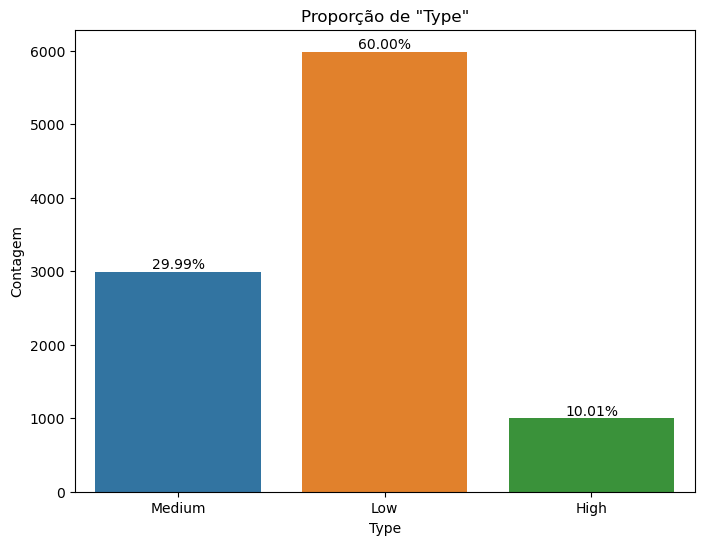

In [ ]:
# Contagem do Type  
tipo_contagem = df['Type'].value_counts()  
  
# Plot do gráfico  
plt.figure(figsize=(8, 6))  
ax = sns.countplot(data=df, x='Type')  
plt.title('Proporção de "Type"')  
plt.xlabel('Type')  
plt.ylabel('Contagem')  
  
# Add as percentages as labels
total = len(df['Type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

*É possível analisar que a classe “**Baixa**” é a classe majoritária, a classe "**Alta**" é a classe minoritária e a classe “**Média**” tem o seu significado.*

**3.8 Plotando a distribuição da coluna "Failure_type".**

Esta coluna já foi analisada anteriormente e falamos sobre a "Random Failure" (Falha aleatória). Vamos ver esta distribuição atualizada com um gráfico de barras para ficar mais claro.

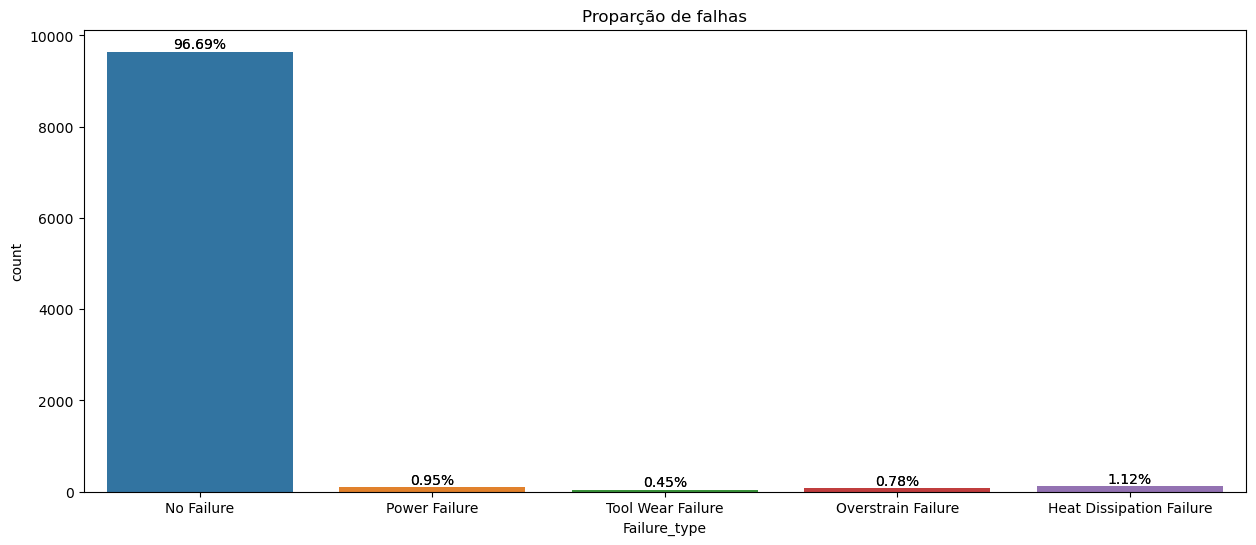

In [ ]:
# Contagem de tipo de falhas  
tipo_contagem = df['Failure_type'].value_counts()  
  
# Plotagem do gráfico  
plt.figure(figsize=(15, 6))  
ax = sns.countplot(data=df, x='Failure_type')  
plt.title('Proparção de falhas')  
plt.xlabel('Type')  
plt.ylabel('contagem')  
ax = sns.countplot(data=df, x = 'Failure_type')  
  
# adicionando as porcetagens e legendas  
total = len(df['Failure_type'])  
for p in ax.patches:  
    height = p.get_height()  
    percentage = (height / total) * 100  
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),  
                 ha='center', va='bottom')  
plt.show()

*Como podemos ver, temos dois problemas aqui para modelar nosso modelo. O primeiro é o desbalanceamento das classes, precisaremos aplicar alguma estratégia para poder construir um modelo modesto, como `SMOTE-NC`, por exemplo. O segundo é que lidaremos com um problema de `multiclasses`, é importante sempre prestar atenção nisso também.*

**3.9 Plotagem de histograma e boxplot das colunas numéricas**

In [ ]:

import pandas as pd

NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

# Criação de subplots: uma linha para histogramas e uma linha para boxplots
fig = make_subplots(rows=2, cols=len(NUMERIC_FEATURES),
                    subplot_titles=[f'Histograma - {feature}' for feature in NUMERIC_FEATURES] + [f'Boxplot de {feature}' for feature in NUMERIC_FEATURES],
                    row_heights=[0.5, 0.5])

# Adiciona histogramas à primeira linha
for i, feature in enumerate(NUMERIC_FEATURES):
    hist = go.Histogram(x=df[feature], name=f'Histograma - {feature}')
    fig.add_trace(hist, row=1, col=i+1)

# Adiciona boxplots à segunda linha
for i, feature in enumerate(NUMERIC_FEATURES):
    box = go.Box(y=df[feature], name=f'Boxplot - {feature}')
    fig.add_trace(box, row=2, col=i+1)

# Atualiza layout
fig.update_layout(height=600, width=1500, title_text='Histogramas e Boxplots', showlegend=False)
fig.update_xaxes(title_text='Valor', row=1, col=1)
fig.update_yaxes(title_text='Frequência', row=1, col=1)
fig.update_yaxes(title_text='Valor', row=2, col=1)

# Mostrar gráfico
fig.show()


*Com relação ao `histograma`, as colunas **Air_temperature**, **Process_temperature** e **torque** são semelhantes a uma distribuição normal, enquanto **rotation_speed** é assimétrica com viés negativo. Em relação ao `boxplot`, aqui é possível confirmar a hipótese de que existem **outliers** em algumas colunas, conforme mencionado no início deste projeto. No entanto, não removeremos esses valores porque faz sentido que, quando uma máquina tem um tipo de falha, os valores medidos por alguns sensores aumentem muito. Além disso, quando a **rotation_speed** aumenta muito, faz total sentido que o **torque** diminua também; isso é um comportamento físico, então os **outliers** detectados na coluna de torque com valores baixos possivelmente são causados por isso.*

**3.10 Plotagem da distribuição somente para as falhas**

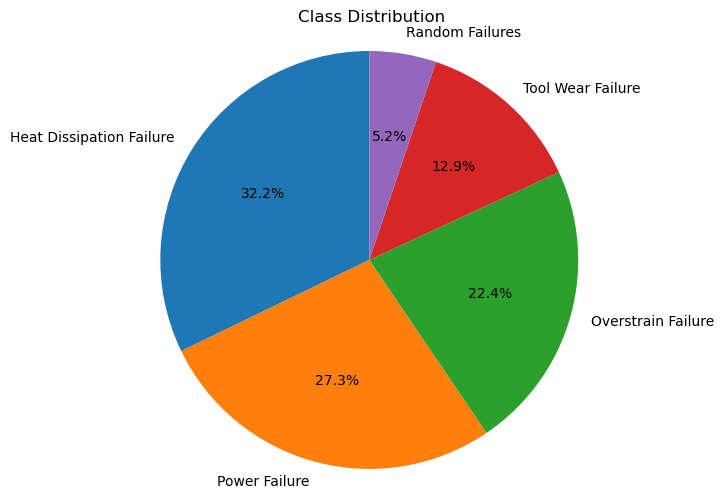

In [ ]:
# Filtrando o dataset para as ocorrencias de falhas.
df_failure_type = df.loc[df['Failure_type'] != "No Failure"]  
  
# Verifique o balanceamento resultante  
proportions = df_failure_type['Failure_type'].value_counts(normalize=True)  
  
# Plotar o gráfico de pizza  
plt.figure(figsize=(8, 6))  
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)  
plt.axis('equal') # Assegura que o gráfico seja desenhado como um círculo  
plt.title('Class Distribution')  
plt.show()

*Há uma pequena porção significativa da classe “**Tool Wear Failure**” em comparação com as outras. Isso pode tornar mais difícil para o modelo prever corretamente essa classe sem uma estratégia para tentar resolver esse problema. Em geral, todos os tipos de falha estão desbalanceados em relação aos valores com “**No Failure**”. Mais adiante, analisaremos como podemos tentar lidar com isso para amenizar o problema.*

**3.11 Análise de correlação utilizando heatmap**

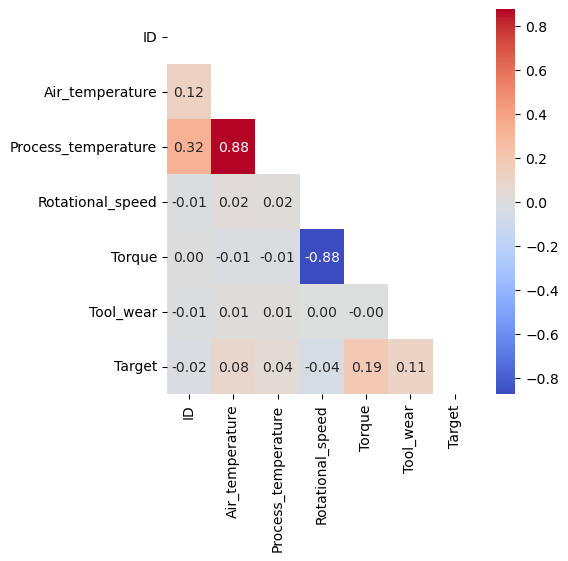

In [ ]:
# Se necessário, selecione apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcule a correlação
corr = df_numeric.corr()

# Configure o tamanho da figura
plt.figure(figsize=(5, 5))

# Crie a máscara para a parte superior do heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plote o heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt=".2f")

# Exiba o gráfico
plt.show()


*Veja que maravilha! Nossa hipótese de que, quando o Torque aumenta, a velocidade rotacional (Rotational_speed) diminui, é verdadeira; há uma correlação negativa expressiva entre essas características (**-0,88**). Além disso, podemos ver agora que a temperatura do processo (Process_temperature) e a temperatura do ar (Air_temperature) também têm uma correlação expressiva; quando a temperatura do ar aumenta, a temperatura do processo também aumenta, e o mesmo acontece no sentido contrário.*


**3.12 Escalar características numéricas e aplicar OneHotEncoder para características categóricas**

Escalar características numéricas antes da modelagem é essencial, pois garante a contribuição igual de todas as características, melhora o desempenho do algoritmo, especialmente para métodos sensíveis à escala, e aumenta a precisão e eficiência do treinamento do modelo.

In [ ]:
# Crie o ColumnTransformer do pré-processador para aplicar OneHotEncoder em CATEGORIC_FEATURES e StandardScaler() em NUMERIC_FEATURES
# Defina os pipelines para as transformações numéricas e categóricas

num_pipeline = Pipeline([  
('num_features', StandardScaler())  
])  
cat_pipeline = Pipeline([  
('cat_features', OneHotEncoder())  
])  
# Criar o ColumnTransformer  
preprocessor = ColumnTransformer(transformers=[  
('num_trans', num_pipeline, NUMERIC_FEATURES),  
('cat_trans', cat_pipeline, CATEGORIC_FEATURES)  
])  
# Ajustar e transformar os dados
df_transformed = preprocessor.fit_transform(df)  

# Converter os dados transformados de volta para um dataframe para facilitar a visualização # Os dados transformados terão novos nomes de colunas, especialmente para as categorias codificadas em one-hot  
encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(CATEGORIC_FEATURES)  
new_column_names = list(NUMERIC_FEATURES) + list(encoded_feature_names)  
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)  
df_transformed.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0


*Transformei o `df_transformed` em um DataFrame para ver as alterações aplicadas apenas por curiosidade. Para realizar a análise PCA, por exemplo (próximo passo), transformar em DataFrame não é necessário; podemos aplicar a análise PCA logo após transformar nosso `df`.*

**3.13 Análise PCA**

PCA (Análise de Componentes Principais) reduz a dimensionalidade dos dados, destaca padrões e simplifica conjuntos de dados, melhorando o desempenho e a interpretabilidade do modelo, enquanto preserva informações essenciais. Vamos verificar quantos componentes explicam mais ou menos 95% dos nossos dados através do gráfico abaixo.

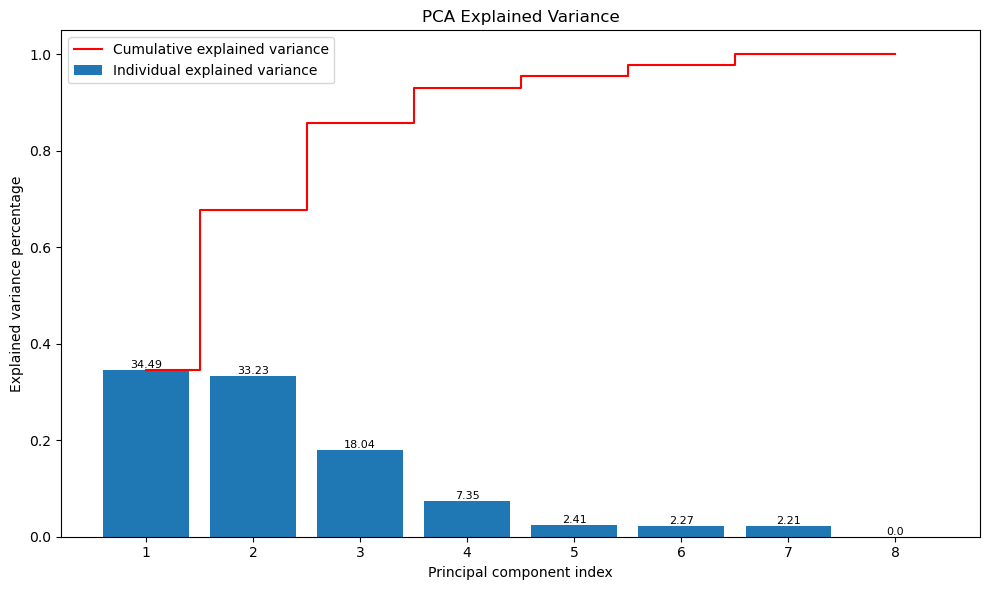

In [ ]:
# Define função PCA 
pca = PCA()  
pca.fit(df_transformed) 
  
# Variância explicada pela PCA 
exp_var = pca.explained_variance_ratio_  
cum_exp_var = exp_var.cumsum()  
  
# Número de componentes 
n_pca_components = len(exp_var)  
  
# Criar o gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center',
               label='Individual explained variance')
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')
  
# Adicionar rótulos em cada barra 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), 
             va='bottom', ha='center', fontsize=8)
  
# Ajustar outros elementos do gráfico 
plt.ylabel('Explained variance percentage')  
plt.xlabel('Principal component index')  
plt.xticks(ticks=list(range(1, n_pca_components + 1)))  
plt.title('PCA Explained Variance')  
plt.legend(loc='best')  
plt.tight_layout()  
plt.show()

*Podemos ver que, com 4 componentes, já explicamos a variabilidade dos nossos dados em torno de 94%. Então, podemos tentar usar apenas esses componentes para modelar e analisar se o desempenho melhora. Em alguns casos, o conjunto de dados pode ser crítico e perder 6% de informação pode piorar o modelo. Analisaremos isso nos próximos passos. Agora, vamos ver o que cada componente explica.*

**3.14 Plotar a explicação dos componentes da PCA**

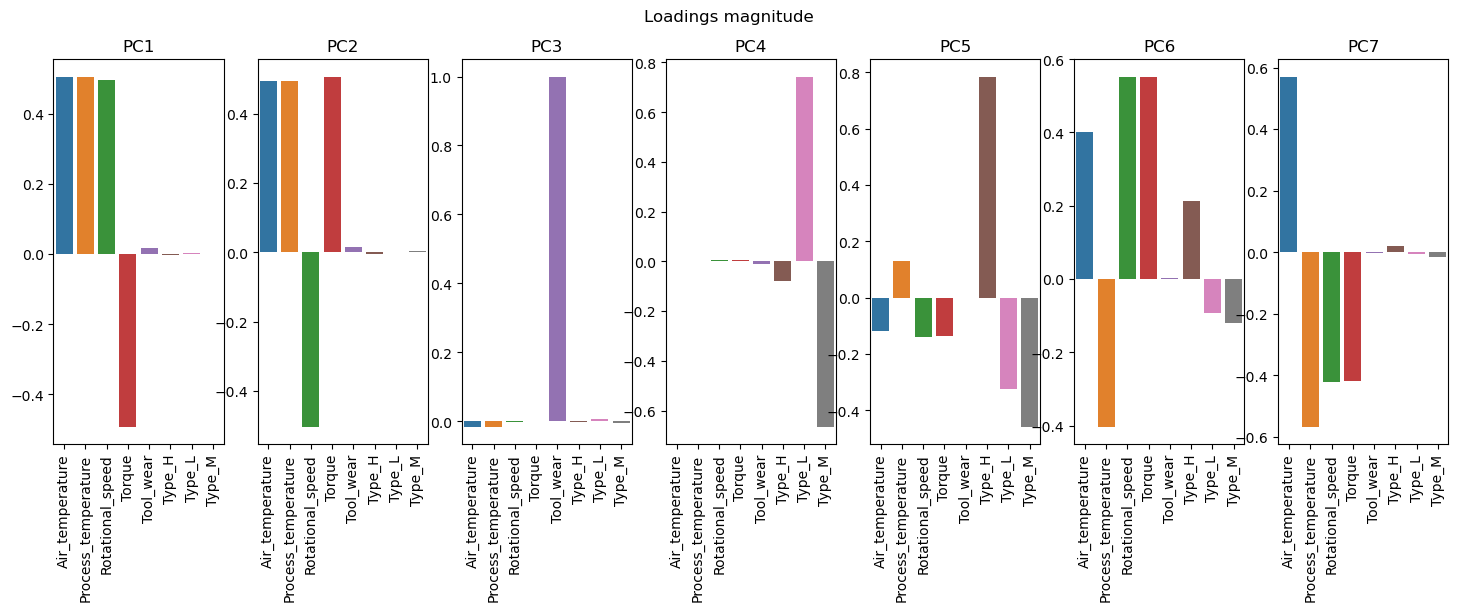

In [ ]:
# PCA com 7 componentes para analisar o que explica cada componente  
pca7 = PCA(n_components=7)  
X_pca7 = pd.DataFrame(data=pca7.fit_transform(df_transformed), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7'])  
  
# Configurar os gráficos 
fig, axs = plt.subplots(ncols=7, figsize=(18,5))  
fig.suptitle('Loadings magnitude')  
  
all_features = NUMERIC_FEATURES + list(encoded_feature_names) # Usar encoded_feature_names para \/
pca_loadings = pd.DataFrame(data=pca7.components_, columns=all_features)  
  
# Plotar os gráficos de barras 
for j in range(7):  
    ax = axs[j]  
    sns.barplot(ax=ax, x=pca_loadings.columns, y=pca_loadings.values[j])  
    ax.tick_params(axis='x', rotation=90)  
    ax.title.set_text('PC'+str(j+1))  
plt.show()

Como pode ser observado, veja abaixo: 
- **PC1 e PC2**: explicados por **Air_temperature**, **Process_temperature**, **Rotational_speed** e **Torque**;
- **PC3**: explicado por **Tool_wear**; 
- **PC4**: mais explicado por **Type_Low** e **Type_Medium**; 
- **PC5**: mais explicado por **Type_High**; 
- **PC6**: mais explicado por **Air_temperature**, **Process_temperature**, **Rotational_speed** e **Torque**; 
- **PC7**: mais explicado por **Air_temperature**, **Process_temperature**, **Rotational_speed** e **Torque**.

# Modelagem

Nesta seção, testaremos várias técnicas para abordar o desbalanceamento de classes, como observado em nosso conjunto de dados. Nosso objetivo é avaliar o desempenho dos modelos tanto com quanto sem o uso de `PCA`. Além disso, utilizaremos o `SMOTE-NC` para gerenciar o desbalanceamento de classes e exploraremos o uso de hiperparâmetros dentro do modelo para balancear as classes sem utilizar o `SMOTE-NC`.

Após determinar qual abordagem melhora mais efetivamente o desempenho do modelo, procederemos para ajustar o modelo com o `GridSearchCV`. Além de desenvolver o melhor modelo, esta seção também testa várias técnicas, como a construção de pré-processadores e pipelines, para otimizar o código e tornar o processo de modelagem mais eficiente.

Todas as abordagens nesta seção têm como objetivo a pontuação Macro F1, que é a melhor métrica para avaliar o melhor modelo para nossa aplicação aqui.

**4.1 Criando função para obter métricas**

In [ ]:
from sklearn.metrics import f1_score  

def get_metrics(y_true, y_pred):  
    # Calculando F1 Score para cada classe
    f1_scores_per_class = f1_score(y_true, y_pred, average=None)  
  
    dict_metrics = {  
        'Accuracy': accuracy_score(y_true, y_pred),  
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),  
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),  
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),  
        'Macro F1': f1_score(y_true, y_pred, average='macro'),  
        'F1 Scores per Class': f1_scores_per_class  
}  
    return dict_metrics

*A média = ‘macro’. Ao aplicar esse método para calcular as métricas, temos uma abordagem melhor para avaliar o modelo porque esse parâmetro calcula a pontuação F1 para cada classe individualmente. Se usarmos “**weighted**”, por exemplo, a métrica é calculada considerando as métricas ponderadas; assim, a classe majoritária tem mais influência no resultado dessa métrica. No nosso cenário, a classe majoritária é ‘**No Failures**’, e é mais fácil simplesmente prever que a máquina não falhará. Ao considerar a importância de classificar corretamente os tipos de falhas, é crucial lembrar que o modelo precisa ter um bom desempenho para todas as classes de forma independente. Portanto, vamos examinar as métricas do modelo usando média = ‘macro’.*

**4.2 Separar o conjunto de dados em treino e teste**

Agora que sabemos o número de componentes que explicam nossos dados, vamos criar uma cópia do nosso conjunto de dados e construir os pipelines. Até preparar o pipeline para escalar valores numéricos (por exemplo, `StandardScaler`/`MinMaxScaler`) e `OneHotEncoder` para as colunas categóricas e lidar com dados desbalanceados, é indispensável separar o conjunto de dados entre treino e teste para prevenir vazamento de dados.

In [ ]:
df_model = df.copy()  
X = df_model[NUMERIC_FEATURES + CATEGORIC_FEATURES]  
y = df_model['Failure_type']  
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

**4.3 Criar modelo com PCA e class_weight**

In [ ]:
# Criar pipeline com análise PCA e classe balanceada
pip_model_pca = Pipeline(steps=[  
	('preprocessor', preprocessor),  
	('pca', PCA(n_components=4)),  
	('model', RandomForestClassifier(random_state=2023))  
	])  
  
# Ajustar o pipeline com PCA 
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_treinamento)  
pip_model_pca.fit(X_treinamento, y_treinamento, model__sample_weight=weights)  
  
# Gerar previsões usando o pipeline corretamente ajustado 
y_pred = pip_model_pca.predict(X_teste)  
  
# Avaliar métricas 
metrics = get_metrics(y_teste, y_pred)  
  
# Ver resultados
metrics

{'Accuracy': 0.9695,
 'Balanced Accuracy': 0.2795953983522159,
 'Macro Recall': 0.2795953983522159,
 'Macro Precision': 0.5410450268817204,
 'Macro F1': 0.32911173564980417,
 'F1 Scores per Class': array([0.24      , 0.98467041, 0.58333333, 0.16666667, 0.        ,
        0.        ])}

**Informações Críticas nos Componentes Eliminados**: Os 7% de variância não capturados pela `PCA` podem conter informações cruciais para o nosso modelo. Isso é particularmente verdadeiro para conjuntos de dados complexos, onde detalhes pequenos, mas importantes, podem ser críticos para previsões precisas.

**Relacionamentos Não Lineares**: `PCA` é uma técnica de redução de dimensionalidade linear. Se nossos dados contêm relacionamentos não lineares que são importantes para as previsões, a `PCA` pode não ser capaz de capturá-los de forma eficaz, levando a uma diminuição no desempenho do modelo.

**Compatibilidade Modelo-Dados**: Alguns modelos são mais sensíveis à representação das características de entrada e podem ter um desempenho melhor com as características originais em vez dos componentes principais. Isso pode ocorrer por vários motivos, incluindo o tipo de algoritmo, a natureza dos dados e a tarefa específica em questão.

**Importância das Interações das Características**: Se as interações entre as características originais são importantes para o nosso modelo, a `PCA`, que cria combinações lineares de características, pode perturbar essas interações.

**É Problemático?** Não necessariamente. É importante lembrar que a `PCA` é apenas uma das muitas ferramentas para redução de dimensionalidade e extração de características. Se a `PCA` não está melhorando ou até mesmo está piorando o desempenho do nosso modelo, é perfeitamente razoável optar por não utilizá-la.

**4.4 Criar modelo sem PCA e com class_weigh**

In [ ]:
# Criando pipeline sem análise PCA e com classe balanceada com parâmetros pelo modelo 
pip_model_no_pca = Pipeline(steps=[
	('preprocessor', preprocessor),  
	('model', GradientBoostingClassifier(random_state=2023))  
	])  
  
# Ajustar pipeline com pesos de amostra   
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_treinamento)  
pip_model_no_pca.fit(X_treinamento, y_treinamento, model__sample_weight=weights)  
  
# Etapa 1: Gerar Predições
y_pred = pip_model_no_pca.predict(X_teste)  
  
# Etapa 2: Avaliar Métricas    
metrics = get_metrics(y_teste, y_pred)  
  
# Etapa 3: Visualizar Resultados
metrics

{'Accuracy': 0.946,
 'Balanced Accuracy': 0.6595238816673232,
 'Macro Recall': 0.6595238816673232,
 'Macro Precision': 0.4912015083824965,
 'Macro F1': 0.550311542601675,
 'F1 Scores per Class': array([0.77192982, 0.97168563, 0.69565217, 0.82926829, 0.        ,
        0.03333333])}

*Como é possível analisar, obtivemos um aumento significativo no desempenho do nosso modelo. Isso confirma a hipótese de que usar PCA com apenas 4 componentes fez com que perdêssemos muitas informações, portanto, usar PCA aqui não é interessante. É importante lembrar que nossa pontuação-alvo é a **Macro F1 score**, então, antes estávamos com **0,33** e agora temos **0,65**.*

**4.5 Criar modelo sem PCA e com SMOTE-NC**

A estratégia aqui é analisar se o modelo tem um desempenho melhor com `class_weight` para lidar com classes desbalanceadas ou com `SMOTE-NC`.

In [ ]:
# Obter os índices das características categóricas para o SMOTENC 
categorical_features_indices = [i for i, feature in enumerate(NUMERIC_FEATURES + CATEGORIC_FEATURES)  
if feature in CATEGORIC_FEATURES]  
  
# Criar o novo pipeline com SMOTENC usando ImbPipeline 
pip_model_smotenc = ImbPipeline(steps=[  
('preprocessor', preprocessor),  
('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)),  
('model', GradientBoostingClassifier(random_state=2023))  
])  
  
# Ajustar o pipeline
pip_model_smotenc.fit(X_treinamento, y_treinamento)  
  
# Gerar previsões
y_pred = pip_model_smotenc.predict(X_teste)  
  
# Avaliar métricas
metrics = get_metrics(y_teste, y_pred)  
  
# Ver resultados
metrics

{'Accuracy': 0.9195,
 'Balanced Accuracy': 0.6723181730953751,
 'Macro Recall': 0.6723181730953751,
 'Macro Precision': 0.5020634912988605,
 'Macro F1': 0.5638011865542015,
 'F1 Scores per Class': array([0.78571429, 0.95701236, 0.74418605, 0.86363636, 0.        ,
        0.03225806])}

*Como podemos ver, usar `SMOTE-NC` para lidar com classes desbalanceadas não é uma abordagem melhor em comparação com `class_weight` ao analisar a M**acro F1 score** (antes **0,65** e agora **0,64**). Além disso, aqui perdemos **precisão** e ganhamos **recall**, mas em nossa aplicação é mais interessante obter uma melhor pontuação **F1**, equilibrando **recall** e **precisão** com mais peso para **precisão**, para que entre as falhas detectadas, o tipo de falha seja classificado corretamente. Portanto, vamos continuar modelando com `class_weight` e buscar o melhor modelo para nossa aplicação.*

**4.6 GridSearchCV para encontrar o melhor modelo**

`GridSearchCV` é uma ferramenta versátil no `scikit-learn` usada para selecionar o melhor modelo de machine learning e otimizar seus hiperparâmetros. Ela realiza uma busca exaustiva sobre um conjunto predefinido de modelos e parâmetros, utilizando validação cruzada para avaliar e comparar o desempenho de cada combinação, permitindo assim a identificação da configuração mais eficaz para um determinado conjunto de dados.

In [ ]:
# Criando pipeline sem análise PCA e classe balanceada com parâmetro por modelo 
pip_model_no_pca = Pipeline(steps=[  
('preprocessor', preprocessor),  
('model', GradientBoostingClassifier(random_state=2023))  
])  
  
# Ajustar pipeline com pesos de amostra
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_treinamento)  
pip_model_no_pca.fit(X_treinamento, y_treinamento, model__sample_weight=weights)  
  
# Parâmetros atualizados para GridSearchCV
params = {  
'model': [  
LogisticRegressionCV(max_iter=500, random_state=2023),  
RandomForestClassifier(random_state=2023),  
GradientBoostingClassifier(random_state=2023),  
DummyClassifier()  
],  
}  
# Executando GridSearchCV
grid = GridSearchCV(pip_model_no_pca, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)  
grid.fit(X_treinamento, y_treinamento)  
  
# Coletando e imprimindo os resultados 
results = pd.DataFrame(grid.cv_results_)  
best_model_index = results['mean_test_score'].idxmax()  
best_model_params = results.loc[best_model_index, 'parâmetros']  
  
# Ver resultados
print("Melhor modelo:")  
print(best_model_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best model:
{'model': GradientBoostingClassifier(random_state=2023)}


*Como podemos ver, o `GradientBoostingClassifier` é o melhor modelo para nossa aplicação em comparação com o `RandomForestClassifier`, `GradientBoostingClassifier` e `DummyClassifier`. Mesmo sabendo que o `DummyClassifier` é o pior modelo, é uma boa prática incluí-lo para ter uma referência com o modelo que não aprende com nossos dados, apenas classifica com a classe mais relevante. Agora, vamos ajustar os hiperparâmetros do nosso modelo.*

*4.7 Ajuste do Modelo*

O modelo possui vários hiperparâmetros para ajuste, mas quanto mais hiperparâmetros você tenta ajustar, mais processamento é necessário. Portanto, para que o ajuste não demande muito tempo para executar as tarefas, vamos tentar ajustar apenas 2 hiperparâmetros que são os mais convenientes.

In [ ]:
# Novos parâmetros para ajuste fino do RandomForestClassifier
fine_tune_params = {  
  
'model__n_estimators': [50, 100, 200, 300, 400, 500],  
'model__max_depth': [None, 5, 10, 15, 20]  
}  
  
# Executando uma nova GridSearchCV para ajuste fino 
fine_tune_grid = GridSearchCV(pip_model_no_pca, fine_tune_params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)  
fine_tune_grid.fit(X_treinamento, y_treinamento)  
  
# Coletando e imprimindo os resultados ajustados  
fine_tuned_results = pd.DataFrame(fine_tune_grid.cv_results_)  
fine_tuned_best_index = fine_tuned_results['mean_test_score'].idxmax()  
fine_tuned_best_params = fine_tuned_results.loc[fine_tuned_best_index, 'params']  
  
# Imprimir os melhores parâmetros do modelo 
print("Melhores parâmetros de modelo ajustados:")  
print(fine_tuned_best_params)  
  
# Encontrar os melhores parâmetros do estimador  
tuned_model = fine_tune_grid.best_estimator_  
y_pred = tuned_model.predict(X_teste)  
  
# Verificar o novo desempenho (foco no F1-score)  
get_metrics(y_teste, y_pred)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best fine-tuned model parameters:
{'model__max_depth': 5, 'model__n_estimators': 200}


{'Accuracy': 0.9825,
 'Balanced Accuracy': 0.561749448397253,
 'Macro Recall': 0.561749448397253,
 'Macro Precision': 0.5913967715476166,
 'Macro F1': 0.5759169576025779,
 'F1 Scores per Class': array([0.93023256, 0.99121901, 0.64516129, 0.88888889, 0.        ,
        0.        ])}

O padrão do `GradientBoostingClassifier` em relação a `max_depth` e `n_estimators` é **3 e 100**, respectivamente. Assim, o `GridSearchCV` detectou que, com esses parâmetros ajustados para **5 e 200**, respectivamente, o modelo tem um desempenho melhor. Como podemos observar, a Macro F1 teve um pequeno aumento no desempenho e o equilíbrio entre recall e precisão é maior. Como mencionado anteriormente, nossa **pontuação-alvo é a Macro F1** com atenção à precisão, então, neste cenário, temos o melhor modelo para nossa aplicação com a abordagem aplicada. Obtivemos **0,66** de Macro F1 e a classe pior classificada é “**Tool Wear Failure**”, para a qual tínhamos menos dados disponíveis, o que faz total sentido.

Este modelo não é excelente, mas considerando que nosso conjunto de dados não é simples e possui classes significativamente desbalanceadas, e que este projeto é focado em aplicar conceitos de ciência de dados, podemos considerar que está “**OK**”. No mundo real, essa métrica pode ser realmente boa, dependendo da aplicação. Em cenários onde a classificação errada não é crucial e quando o modelo classifica corretamente traz vantagens, o modelo pode ajudar a obter mais lucro ou reduzir os gastos.

**4.8 Matriz de Confusão**

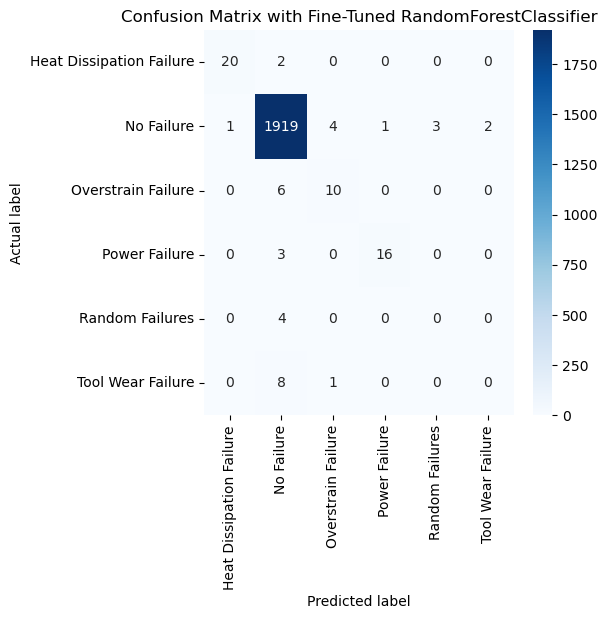

In [ ]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_teste, y_pred)  
  
# Plotar a matriz de confusão   
plt.figure(figsize=(5, 5)) # Tamanho da figura maior  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # Usar 'd' para formatar números como inteiros  
xticklabels=np.unique(y_teste),  
yticklabels=np.unique(y_pred))  
plt.ylabel('Actual label')  
plt.xlabel('Predicted label')  
plt.title('Confusion Matrix with Fine-Tuned RandomForestClassifier')  
plt.show()

## Implantação (Deploy)

Então, vamos implantar o modelo e colocá-lo no `Streamlit` para uso prático e para inserir novos dados para previsão. Você pode encontrar o arquivo de configuração em “streamlit_setup/streamlit.py”. Veja abaixo a aplicação em funcionamento:

In [ ]:
# Salvando o arquivo
with open('model.pkl', 'wb') as model_file:  
    pickle.dump(tuned_model, model_file)